# ProblemStatement :-
The objective of this project is to conduct an Exploratory Data Analysis (EDA) on a dataset of used cars from Cars24 to uncover insights about the used car market, identify key factors affecting car prices, and provide a foundation for predictive modeling. By analyzing various attributes such as brand, model, year of manufacture, mileage, fuel type, and ownership history, we aim to understand the distribution of car prices, the impact of different factors on pricing, and market trends. This analysis will help in identifying popular car models, understanding customer preferences, and providing actionable insights for buyers and sellers to make informed decisions and optimize pricing strategies.

# WebScraping and Extracting Data from Cars24 website

In [29]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import re
from bs4 import BeautifulSoup

# Set up the WebDriver
driver = webdriver.Chrome()
driver.get("https://www.cars24.com/buy-used-car?sort=P&serveWarrantyCount=true&gaId=2092139588.1731679302&listingSource=FilterTags&storeCityId=2")  # Replace with your target URL

# Scroll down the page
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)  # Wait for new content to load
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

# Get the page source and parse it with BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')

# Find all car entries
car_entries = soup.find_all('div', class_='_7jb8Q _1Ey60')

# Loop through each car entry and extract details
cars_data = []

for car in car_entries:
    # Extract car title and model
    car_title = car.find('h3', class_='_2Out2').contents[0].strip() if car.find('h3', class_='_2Out2') else None
    car_model = car.find('h3', class_='_2Out2').find('span').text.strip() if car.find('h3', class_='_2Out2').find('span') else None

    # Extract the year from the car title
    year = car_title.split()[0] if car_title else None
    car_title = ' '.join(car_title.split()[1:]) if car_title else None  # Remove the year from the title

    # Extract mileage, fuel type, and ownership using more flexible methods
    details_list = car.find('ul', class_='_3jRcd').find_all('li') if car.find('ul', class_='_3jRcd') else []

    # Use regular expression to find mileage
    kilometers_drived = None
    if details_list:
        for detail in details_list:
            if re.search(r'\d+[,.\d]*\s*km', detail.text, re.IGNORECASE):
                kilometers_drived = detail.text.replace('km','').strip()
                break

    # Extract fuel type using keyword search
    fuel_type = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "petrol" in text:
            fuel_type = "Petrol"
            break
        elif "diesel" in text:
            fuel_type = "Diesel"
            break

    # Extract ownership using keyword search
    ownership = None
    for detail in details_list:
        text = detail.text.strip().lower()
        if "1st owner" in text:
            ownership = "1st Owner"
            break
        elif "2nd owner" in text:
            ownership = "2nd Owner"
            break

    # Extract EMI information and remove "EMI from" text
    emi_info = car.find('div', class_='_1Oul-').find('span', class_='_1t1AA').text.strip() if car.find('div', class_='_1Oul-') else None
    if emi_info:
        emi_info = emi_info.replace('EMI', '').replace('/m','').replace('₹','').strip()

    # Extract price details
    price_div = car.find('div', class_='_1Oul- VMjdr')
    current_price = price_div.find('strong', class_='_37WXy').text.strip() if price_div and price_div.find('strong', class_='_37WXy') else None
    original_price = price_div.find('span', class_='_3hb01').text.strip() if price_div and price_div.find('span', class_='_3hb01') else None

    # Extract location details only and remove "at"
    location_info = car.find('p', class_='_2rxhF').find('span').text.strip() if car.find('p', class_='_2rxhF') and car.find('p', class_='_2rxhF').find('span') else None
    if location_info:
        location_info = location_info.replace('at', '').strip()
        location_info = location_info.split()[-1]

    # Append the extracted data to the list
    cars_data.append({
        'Title': car_title,
        'Variant': car_model,
        'Year': year,
        'Kilometers_Drived': kilometers_drived,
        'Fuel_Type': fuel_type,
        'Ownership': ownership,
        'Emi_per_month': emi_info,
        'Current_Price': current_price,
        'Original_Price': original_price,
        'Location': location_info
    })

# Print the extracted data
for car in cars_data:
    print(car)
driver.quit()

{'Title': 'Mahindra Thar', 'Variant': 'LX D 4WD MT CONVERTIBLE', 'Year': '2020', 'Kilometers_Drived': '11,003', 'Fuel_Type': 'Diesel', 'Ownership': '1st Owner', 'Emi_per_month': '21,756', 'Current_Price': '₹11.43L', 'Original_Price': '₹12.31L', 'Location': 'Delhi'}
{'Title': 'Tata Harrier', 'Variant': 'XT PLUS 2.0L KRYOTEC DARK EDITON', 'Year': '2022', 'Kilometers_Drived': '27,990', 'Fuel_Type': 'Diesel', 'Ownership': '1st Owner', 'Emi_per_month': '26,514', 'Current_Price': '₹13.93L', 'Original_Price': '₹16.32L', 'Location': 'Delhi'}
{'Title': 'Mahindra Scorpio', 'Variant': 'S11 2WD', 'Year': '2020', 'Kilometers_Drived': '38,553', 'Fuel_Type': 'Diesel', 'Ownership': '1st Owner', 'Emi_per_month': '27,162', 'Current_Price': '₹14.27L', 'Original_Price': '₹15.79L', 'Location': 'Noida'}
{'Title': 'Tata PUNCH', 'Variant': 'CREATIVE  1.2 RTN DUAL TONE', 'Year': '2022', 'Kilometers_Drived': '450', 'Fuel_Type': 'Petrol', 'Ownership': '1st Owner', 'Emi_per_month': '14,917', 'Current_Price': '₹7.

In [31]:
cars_data

[{'Title': 'Mahindra Thar',
  'Variant': 'LX D 4WD MT CONVERTIBLE',
  'Year': '2020',
  'Kilometers_Drived': '11,003',
  'Fuel_Type': 'Diesel',
  'Ownership': '1st Owner',
  'Emi_per_month': '21,756',
  'Current_Price': '₹11.43L',
  'Original_Price': '₹12.31L',
  'Location': 'Delhi'},
 {'Title': 'Tata Harrier',
  'Variant': 'XT PLUS 2.0L KRYOTEC DARK EDITON',
  'Year': '2022',
  'Kilometers_Drived': '27,990',
  'Fuel_Type': 'Diesel',
  'Ownership': '1st Owner',
  'Emi_per_month': '26,514',
  'Current_Price': '₹13.93L',
  'Original_Price': '₹16.32L',
  'Location': 'Delhi'},
 {'Title': 'Mahindra Scorpio',
  'Variant': 'S11 2WD',
  'Year': '2020',
  'Kilometers_Drived': '38,553',
  'Fuel_Type': 'Diesel',
  'Ownership': '1st Owner',
  'Emi_per_month': '27,162',
  'Current_Price': '₹14.27L',
  'Original_Price': '₹15.79L',
  'Location': 'Noida'},
 {'Title': 'Tata PUNCH',
  'Variant': 'CREATIVE  1.2 RTN DUAL TONE',
  'Year': '2022',
  'Kilometers_Drived': '450',
  'Fuel_Type': 'Petrol',
  'Ow

In [33]:
len(cars_data) #length of data

840

In [229]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [37]:
df = pd.DataFrame(cars_data) #converting data into dataframe

In [39]:
df


,Title,Variant,Year,Kilometers_Drived,Fuel_Type,Ownership,Emi_per_month,Current_Price,Original_Price,Location
0,Mahindra Thar,LX D 4WD MT CONVERTIBLE,2020,"11,003",Diesel,1st Owner,"21,756",₹11.43L,₹12.31L,Delhi
1,Tata Harrier,XT PLUS 2.0L KRYOTEC DARK EDITON,2022,"27,990",Diesel,1st Owner,"26,514",₹13.93L,₹16.32L,Delhi
2,Mahindra Scorpio,S11 2WD,2020,"38,553",Diesel,1st Owner,"27,162",₹14.27L,₹15.79L,Noida
3,Tata PUNCH,CREATIVE 1.2 RTN DUAL TONE,2022,450,Petrol,1st Owner,"14,917",₹7.63L,₹8.46L,Ghaziabad
4,Mahindra XUV700,AX 7 LUXURY D AWD AT 7 STR,2022,"62,839",Diesel,1st Owner,"39,020",₹20.50L,₹23.22L,Gurugram
...,...,...,...,...,...,...,...,...,...,...
835,Honda BR-V,1.5L I-VTEC V,2016,"29,151",Petrol,2nd Owner,"11,280",₹5.77L,None,Delhi
836,Volkswagen Vento,HIGHLINE 1.6 MPI,2013,"71,793",Petrol,1st Owner,"8,716",₹3.31L,₹3.58L,Noida
837,Maruti Swift,ZXI PLUS,2018,"37,041",Petrol,2nd Owner,"11,085",₹5.67L,None,Noida
838,Ford Ecosport,TITANIUM 1.5L PETROL AT,2016,"49,798",Petrol,1st Owner,"10,661",₹5.45L,None,Delhi


In [41]:
df[['Make','Model']]=df['Title'].str.split(' ',n=1,expand=True)
#spliting title columns into 2 columns by using delimilator ''

In [43]:
df

,Title,Variant,Year,Kilometers_Drived,Fuel_Type,Ownership,Emi_per_month,Current_Price,Original_Price,Location,Make,Model
0,Mahindra Thar,LX D 4WD MT CONVERTIBLE,2020,"11,003",Diesel,1st Owner,"21,756",₹11.43L,₹12.31L,Delhi,Mahindra,Thar
1,Tata Harrier,XT PLUS 2.0L KRYOTEC DARK EDITON,2022,"27,990",Diesel,1st Owner,"26,514",₹13.93L,₹16.32L,Delhi,Tata,Harrier
2,Mahindra Scorpio,S11 2WD,2020,"38,553",Diesel,1st Owner,"27,162",₹14.27L,₹15.79L,Noida,Mahindra,Scorpio
3,Tata PUNCH,CREATIVE 1.2 RTN DUAL TONE,2022,450,Petrol,1st Owner,"14,917",₹7.63L,₹8.46L,Ghaziabad,Tata,PUNCH
4,Mahindra XUV700,AX 7 LUXURY D AWD AT 7 STR,2022,"62,839",Diesel,1st Owner,"39,020",₹20.50L,₹23.22L,Gurugram,Mahindra,XUV700
...,...,...,...,...,...,...,...,...,...,...,...,...
835,Honda BR-V,1.5L I-VTEC V,2016,"29,151",Petrol,2nd Owner,"11,280",₹5.77L,None,Delhi,Honda,BR-V
836,Volkswagen Vento,HIGHLINE 1.6 MPI,2013,"71,793",Petrol,1st Owner,"8,716",₹3.31L,₹3.58L,Noida,Volkswagen,Vento
837,Maruti Swift,ZXI PLUS,2018,"37,041",Petrol,2nd Owner,"11,085",₹5.67L,None,Noida,Maruti,Swift
838,Ford Ecosport,TITANIUM 1.5L PETROL AT,2016,"49,798",Petrol,1st Owner,"10,661",₹5.45L,None,Delhi,Ford,Ecosport


In [45]:
df = df[['Make', 'Model', 'Title', 'Variant', 'Year', 'Kilometers_Drived', 'Fuel_Type', 'Ownership', 'Emi_per_month', 'Current_Price', 'Original_Price', 'Location']]
#Rearranging the columns

In [47]:
df

,Make,Model,Title,Variant,Year,Kilometers_Drived,Fuel_Type,Ownership,Emi_per_month,Current_Price,Original_Price,Location
0,Mahindra,Thar,Mahindra Thar,LX D 4WD MT CONVERTIBLE,2020,"11,003",Diesel,1st Owner,"21,756",₹11.43L,₹12.31L,Delhi
1,Tata,Harrier,Tata Harrier,XT PLUS 2.0L KRYOTEC DARK EDITON,2022,"27,990",Diesel,1st Owner,"26,514",₹13.93L,₹16.32L,Delhi
2,Mahindra,Scorpio,Mahindra Scorpio,S11 2WD,2020,"38,553",Diesel,1st Owner,"27,162",₹14.27L,₹15.79L,Noida
3,Tata,PUNCH,Tata PUNCH,CREATIVE 1.2 RTN DUAL TONE,2022,450,Petrol,1st Owner,"14,917",₹7.63L,₹8.46L,Ghaziabad
4,Mahindra,XUV700,Mahindra XUV700,AX 7 LUXURY D AWD AT 7 STR,2022,"62,839",Diesel,1st Owner,"39,020",₹20.50L,₹23.22L,Gurugram
...,...,...,...,...,...,...,...,...,...,...,...,...
835,Honda,BR-V,Honda BR-V,1.5L I-VTEC V,2016,"29,151",Petrol,2nd Owner,"11,280",₹5.77L,None,Delhi
836,Volkswagen,Vento,Volkswagen Vento,HIGHLINE 1.6 MPI,2013,"71,793",Petrol,1st Owner,"8,716",₹3.31L,₹3.58L,Noida
837,Maruti,Swift,Maruti Swift,ZXI PLUS,2018,"37,041",Petrol,2nd Owner,"11,085",₹5.67L,None,Noida
838,Ford,Ecosport,Ford Ecosport,TITANIUM 1.5L PETROL AT,2016,"49,798",Petrol,1st Owner,"10,661",₹5.45L,None,Delhi


In [49]:
df.drop("Title",axis=1,inplace=True) #dropping title column

C:\Users\Dell\AppData\Local\Temp\ipykernel_21856\1383020526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Title",axis=1,inplace=True)


In [51]:
df

,Make,Model,Variant,Year,Kilometers_Drived,Fuel_Type,Ownership,Emi_per_month,Current_Price,Original_Price,Location
0,Mahindra,Thar,LX D 4WD MT CONVERTIBLE,2020,"11,003",Diesel,1st Owner,"21,756",₹11.43L,₹12.31L,Delhi
1,Tata,Harrier,XT PLUS 2.0L KRYOTEC DARK EDITON,2022,"27,990",Diesel,1st Owner,"26,514",₹13.93L,₹16.32L,Delhi
2,Mahindra,Scorpio,S11 2WD,2020,"38,553",Diesel,1st Owner,"27,162",₹14.27L,₹15.79L,Noida
3,Tata,PUNCH,CREATIVE 1.2 RTN DUAL TONE,2022,450,Petrol,1st Owner,"14,917",₹7.63L,₹8.46L,Ghaziabad
4,Mahindra,XUV700,AX 7 LUXURY D AWD AT 7 STR,2022,"62,839",Diesel,1st Owner,"39,020",₹20.50L,₹23.22L,Gurugram
...,...,...,...,...,...,...,...,...,...,...,...
835,Honda,BR-V,1.5L I-VTEC V,2016,"29,151",Petrol,2nd Owner,"11,280",₹5.77L,None,Delhi
836,Volkswagen,Vento,HIGHLINE 1.6 MPI,2013,"71,793",Petrol,1st Owner,"8,716",₹3.31L,₹3.58L,Noida
837,Maruti,Swift,ZXI PLUS,2018,"37,041",Petrol,2nd Owner,"11,085",₹5.67L,None,Noida
838,Ford,Ecosport,TITANIUM 1.5L PETROL AT,2016,"49,798",Petrol,1st Owner,"10,661",₹5.45L,None,Delhi


In [53]:
df.to_csv("Cars_24.csv",encoding='utf-8-sig', index=False) 
#converting dataframe into csv file

# DataCleaning and Handling missing Values

In [231]:
df=pd.read_csv("Cars_24.csv") #loading csv file using pandas

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               840 non-null    object
 1   Model              840 non-null    object
 2   Variant            840 non-null    object
 3   Year               840 non-null    int64 
 4   Kilometers_Drived  840 non-null    object
 5   Fuel_Type          761 non-null    object
 6   Ownership          835 non-null    object
 7   Emi_per_month      840 non-null    object
 8   Current_Price      840 non-null    object
 9   Original_Price     669 non-null    object
 10  Location           840 non-null    object
dtypes: int64(1), object(10)
memory usage: 72.3+ KB


In [52]:
df

,Make,Model,Variant,Year,Kilometers_Drived,Fuel_Type,Ownership,Emi_per_month,Current_Price,Original_Price,Location
0,Mahindra,Thar,LX D 4WD MT CONVERTIBLE,2020,"11,003",Diesel,1st Owner,"21,756",1143000,1231000.0,Delhi
1,Tata,Harrier,XT PLUS 2.0L KRYOTEC DARK EDITON,2022,"27,990",Diesel,1st Owner,"26,514",1393000,1632000.0,Delhi
2,Mahindra,Scorpio,S11 2WD,2020,"38,553",Diesel,1st Owner,"27,162",1427000,1579000.0,Noida
3,Tata,PUNCH,CREATIVE 1.2 RTN DUAL TONE,2022,450,Petrol,1st Owner,"14,917",763000,846000.0,Ghaziabad
4,Mahindra,XUV700,AX 7 LUXURY D AWD AT 7 STR,2022,"62,839",Diesel,1st Owner,"39,020",2050000,2322000.0,Gurugram
...,...,...,...,...,...,...,...,...,...,...,...
835,Honda,BR-V,1.5L I-VTEC V,2016,"29,151",Petrol,2nd Owner,"11,280",577000,NaN,Delhi
836,Volkswagen,Vento,HIGHLINE 1.6 MPI,2013,"71,793",Petrol,1st Owner,"8,716",331000,358000.0,Noida
837,Maruti,Swift,ZXI PLUS,2018,"37,041",Petrol,2nd Owner,"11,085",567000,NaN,Noida
838,Ford,Ecosport,TITANIUM 1.5L PETROL AT,2016,"49,798",Petrol,1st Owner,"10,661",545000,NaN,Delhi


In [233]:
df["Kilometers_Drived"]=df["Kilometers_Drived"].str.replace(',','').astype(int)
#Removing ',' and changing datatype into int

In [235]:
df["Emi_per_month"]=df["Emi_per_month"].str.replace(',','').astype(int)
#Removing ',' and changing datatype into int

In [237]:
df["Fuel_Type"].fillna('CNG',inplace=True)
#filling CNG at null values 

C:\Users\Dell\AppData\Local\Temp\ipykernel_23964\1564343436.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [13]:
df[df['Fuel_Type'] == 'CNG']

,Make,Model,Variant,Year,Kilometers_Drived,Fuel_Type,Ownership,Emi_per_month,Current_Price,Original_Price,Location
17,Maruti,S PRESSO,VXI CNG,2020,75502,CNG,1st Owner,8411,₹4.30L,NaN,Delhi
19,Hyundai,AURA,S 1.2 CNG,2022,39362,CNG,1st Owner,13607,₹6.96L,₹7.78L,Delhi
25,Hyundai,NEW SANTRO,SPORTZ CNG,2020,63272,CNG,1st Owner,9845,₹5.04L,₹5.72L,Noida
45,Hyundai,NEW SANTRO,SPORTZ CNG,2020,63272,CNG,1st Owner,9845,₹5.04L,₹5.72L,Noida
127,Hyundai,Creta,SX PLUS 1.6 PETROL,2016,84938,CNG,2nd Owner,15148,₹6.81L,₹7.54L,Faridabad
...,...,...,...,...,...,...,...,...,...,...,...
780,Maruti,Baleno,DELTA PETROL 1.2,2019,78811,CNG,1st Owner,11225,₹5.74L,NaN,Noida
822,Maruti,Vitara Brezza,VXI AT SHVS,2020,87203,CNG,1st Owner,14995,₹7.67L,NaN,Ghaziabad
828,Maruti,Ertiga,VXI CNG,2021,71318,CNG,1st Owner,18901,₹9.93L,NaN,Delhi
832,Maruti,Baleno,DELTA PETROL 1.2,2019,71959,CNG,1st Owner,10655,₹5.45L,₹6.21L,Noida


In [15]:
df["Fuel_Type"].isna().sum()

0

In [17]:
df["Ownership"].mode()

0    1st Owner
Name: Ownership, dtype: object

In [239]:
df['Ownership']= df['Ownership'].fillna(df['Ownership'].mode()[0])
#filling nan values with mode

In [21]:
df['Ownership'].isna().sum()

0

In [23]:
df["Original_Price"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 840 entries, 0 to 839
Series name: Original_Price
Non-Null Count  Dtype 
--------------  ----- 
669 non-null    object
dtypes: object(1)
memory usage: 6.7+ KB


In [241]:
df['Original_Price'] = df['Original_Price'].fillna(df['Current_Price'])
#filling nan values with respect to currentprice

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               840 non-null    object
 1   Model              840 non-null    object
 2   Variant            840 non-null    object
 3   Year               840 non-null    int64 
 4   Kilometers_Drived  840 non-null    int32 
 5   Fuel_Type          840 non-null    object
 6   Ownership          840 non-null    object
 7   Emi_per_month      840 non-null    int32 
 8   Current_Price      840 non-null    object
 9   Original_Price     840 non-null    object
 10  Location           840 non-null    object
dtypes: int32(2), int64(1), object(8)
memory usage: 65.8+ KB


In [245]:
df

,Make,Model,Variant,Year,Kilometers_Drived,Fuel_Type,Ownership,Emi_per_month,Current_Price,Original_Price,Location
0,Mahindra,Thar,LX D 4WD MT CONVERTIBLE,2020,11003,Diesel,1st Owner,21756,₹11.43L,₹12.31L,Delhi
1,Tata,Harrier,XT PLUS 2.0L KRYOTEC DARK EDITON,2022,27990,Diesel,1st Owner,26514,₹13.93L,₹16.32L,Delhi
2,Mahindra,Scorpio,S11 2WD,2020,38553,Diesel,1st Owner,27162,₹14.27L,₹15.79L,Noida
3,Tata,PUNCH,CREATIVE 1.2 RTN DUAL TONE,2022,450,Petrol,1st Owner,14917,₹7.63L,₹8.46L,Ghaziabad
4,Mahindra,XUV700,AX 7 LUXURY D AWD AT 7 STR,2022,62839,Diesel,1st Owner,39020,₹20.50L,₹23.22L,Gurugram
...,...,...,...,...,...,...,...,...,...,...,...
835,Honda,BR-V,1.5L I-VTEC V,2016,29151,Petrol,2nd Owner,11280,₹5.77L,₹5.77L,Delhi
836,Volkswagen,Vento,HIGHLINE 1.6 MPI,2013,71793,Petrol,1st Owner,8716,₹3.31L,₹3.58L,Noida
837,Maruti,Swift,ZXI PLUS,2018,37041,Petrol,2nd Owner,11085,₹5.67L,₹5.67L,Noida
838,Ford,Ecosport,TITANIUM 1.5L PETROL AT,2016,49798,Petrol,1st Owner,10661,₹5.45L,₹5.45L,Delhi


In [31]:
df.describe()

,Year,Kilometers_Drived,Emi_per_month
count,840.000000,840.000000,840.000000
mean,2018.747619,48597.211905,12696.761905
std,2.880309,25857.010179,5709.920670
min,2011.000000,450.000000,3421.000000
25%,2017.000000,28408.750000,8719.750000
50%,2019.000000,44765.500000,11299.000000
75%,2021.000000,65988.750000,15249.000000
max,2024.000000,125298.000000,39020.000000


In [252]:
#in csv file Price is present in ₹2.45L form so i write a function to remove ₹ and L and converts value into lakhs
def convert_price(price):
    # Remove the currency symbol
    price = price.replace('₹', '')
    # Convert 'L' to lakhs (1 lakh = 100,000)
    if 'L' in price:
        price = price.replace('L', '')
        return int(float(price) * 100000)
    return int(float(price))

In [262]:
df['Current_Price'] = df['Current_Price'].apply(lambda x: convert_price(str(x)))

In [264]:
df['Original_Price'] = df['Original_Price'].apply(lambda x: convert_price(str(x)))

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               840 non-null    object
 1   Model              840 non-null    object
 2   Variant            840 non-null    object
 3   Year               840 non-null    int64 
 4   Kilometers_Drived  840 non-null    int32 
 5   Fuel_Type          840 non-null    object
 6   Ownership          840 non-null    object
 7   Emi_per_month      840 non-null    int32 
 8   Current_Price      840 non-null    int64 
 9   Original_Price     840 non-null    int64 
 10  Location           840 non-null    object
dtypes: int32(2), int64(3), object(6)
memory usage: 65.8+ KB


In [268]:
q1c = df["Current_Price"].quantile(0.25)
q3c = df["Current_Price"].quantile(0.75)
iqrc = q3c-q1c
q1o = df["Original_Price"].quantile(0.25)
q3o = df["Original_Price"].quantile(0.75)
iqro = q3o-q1o
q1e = df["Emi_per_month"].quantile(0.25)
q3e = df["Emi_per_month"].quantile(0.75)
iqre = q3e-q1e

In [270]:
q1c,q3c,iqrc,q1o,q3o,iqro,q1e,q3e,iqre

(425750.0,
 775250.0,
 349500.0,
 465750.0,
 831000.0,
 365250.0,
 8719.75,
 15249.0,
 6529.25)

In [272]:
upper_limit_c = q3c + (1.5 * iqrc)
lower_limit_c = q1c - (1.5 * iqrc)
upper_limit_o = q3o + (1.5 * iqro)
lower_limit_o = q1o - (1.5 * iqro)
upper_limit_e = q3e + (1.5 * iqre)
lower_limit_e = q1e - (1.5 * iqre)
lower_limit_c , upper_limit_c,lower_limit_o , upper_limit_o,lower_limit_e,upper_limit_e,

(-98500.0, 1299500.0, -82125.0, 1378875.0, -1074.125, 25042.875)

In [103]:
#finding the outliers
df.loc[(df['Current_Price'] > upper_limit_c) | (df["Current_Price"] < lower_limit_c)]

,Make,Model,Variant,Year,Kilometers_Drived,Fuel_Type,Ownership,Emi_per_month,Current_Price,Original_Price,Location
1,Tata,Harrier,XT PLUS 2.0L KRYOTEC DARK EDITON,2022,27990,Diesel,1st Owner,26514,1393000,1632000,Delhi
2,Mahindra,Scorpio,S11 2WD,2020,38553,Diesel,1st Owner,27162,1427000,1579000,Noida
4,Mahindra,XUV700,AX 7 LUXURY D AWD AT 7 STR,2022,62839,Diesel,1st Owner,39020,2050000,2322000,Gurugram
9,MG,HECTOR,SHARP 1.5 PETROL CVT,2022,26999,Petrol,1st Owner,29408,1545000,1735000,Delhi
14,KIA,CARENS,LUXURY PLUS 1.5 DIESEL AT 7 STR,2022,34785,Diesel,1st Owner,29217,1535000,1653000,Gurugram
30,Volkswagen,VIRTUS,HIGHLINE TSI 1.0 AT,2023,9083,Petrol,1st Owner,25753,1353000,1457000,Gurugram
50,Volkswagen,VIRTUS,HIGHLINE TSI 1.0 AT,2023,9083,Petrol,1st Owner,25753,1353000,1457000,Gurugram
145,Mahindra,Thar,LX P 4WD AT CONVERTIBLE,2022,29244,Petrol,1st Owner,25091,1318000,1441000,Delhi
148,Tata,Harrier,XZA PLUS 2.0L,2022,27543,Diesel,1st Owner,32510,1707999,1822000,Noida
228,KIA,SELTOS,GTX PLUS AT 1.5 DIESEL,2021,66666,Diesel,1st Owner,26362,1385000,1476000,Noida


In [145]:
#trimming - removing the outliers
new_df = df.loc[
    (df["Current_Price"] < upper_limit_c) & (df["Current_Price"] > lower_limit_c) &
    (df["Original_Price"] < upper_limit_o) & (df["Original_Price"] > lower_limit_o) &
    (df["Emi_per_month"] < upper_limit_e) & (df["Emi_per_month"] > lower_limit_e)]
print('before removing outliers:',len(df))
print('after removing outliers:',len(new_df))
print('outliers:',len(df)-len(new_df))

before removing outliers: 840
after removing outliers: 787
outliers: 53


In [153]:
#copping - change the outliers values to upper or lower limits values
new_df = df.copy()
new_df.loc[(df["Current_Price"]>upper_limit_c), 'Current_Price'] = upper_limit_c
new_df.loc[(df["Current_Price"]<lower_limit_c), 'Current_Price'] = lower_limit_c
new_df.loc[(df["Emi_per_month"]>upper_limit_e), 'Emi_per_month'] = upper_limit_e
new_df.loc[(df["Emi_per_month"]<lower_limit_e), 'Emi_per_month'] = lower_limit_e
new_df.loc[(df["Original_Price"]>upper_limit_o), 'Original_Price'] = upper_limit_o
new_df.loc[(df["Original_Price"]<lower_limit_o), 'Original_Price'] = lower_limit_o

C:\Users\Dell\AppData\Local\Temp\ipykernel_23964\264970097.py:4: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '25042.875' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.



In [155]:
new_df #data after cleaned

,Make,Model,Variant,Year,Kilometers_Drived,Fuel_Type,Ownership,Emi_per_month,Current_Price,Original_Price,Location
0,Mahindra,Thar,LX D 4WD MT CONVERTIBLE,2020,11003,Diesel,1st Owner,21756.000,1143000,1231000,Delhi
1,Tata,Harrier,XT PLUS 2.0L KRYOTEC DARK EDITON,2022,27990,Diesel,1st Owner,25042.875,1299500,1378875,Delhi
2,Mahindra,Scorpio,S11 2WD,2020,38553,Diesel,1st Owner,25042.875,1299500,1378875,Noida
3,Tata,PUNCH,CREATIVE 1.2 RTN DUAL TONE,2022,450,Petrol,1st Owner,14917.000,763000,846000,Ghaziabad
4,Mahindra,XUV700,AX 7 LUXURY D AWD AT 7 STR,2022,62839,Diesel,1st Owner,25042.875,1299500,1378875,Gurugram
...,...,...,...,...,...,...,...,...,...,...,...
835,Honda,BR-V,1.5L I-VTEC V,2016,29151,Petrol,2nd Owner,11280.000,577000,577000,Delhi
836,Volkswagen,Vento,HIGHLINE 1.6 MPI,2013,71793,Petrol,1st Owner,8716.000,331000,358000,Noida
837,Maruti,Swift,ZXI PLUS,2018,37041,Petrol,2nd Owner,11085.000,567000,567000,Noida
838,Ford,Ecosport,TITANIUM 1.5L PETROL AT,2016,49798,Petrol,1st Owner,10661.000,545000,545000,Delhi


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               840 non-null    object
 1   Model              840 non-null    object
 2   Variant            840 non-null    object
 3   Year               840 non-null    int64 
 4   Kilometers_Drived  840 non-null    int32 
 5   Fuel_Type          840 non-null    object
 6   Ownership          840 non-null    object
 7   Emi_per_month      840 non-null    int32 
 8   Current_Price      840 non-null    int64 
 9   Original_Price     840 non-null    int64 
 10  Location           840 non-null    object
dtypes: int32(2), int64(3), object(6)
memory usage: 65.8+ KB


# Data Visualization

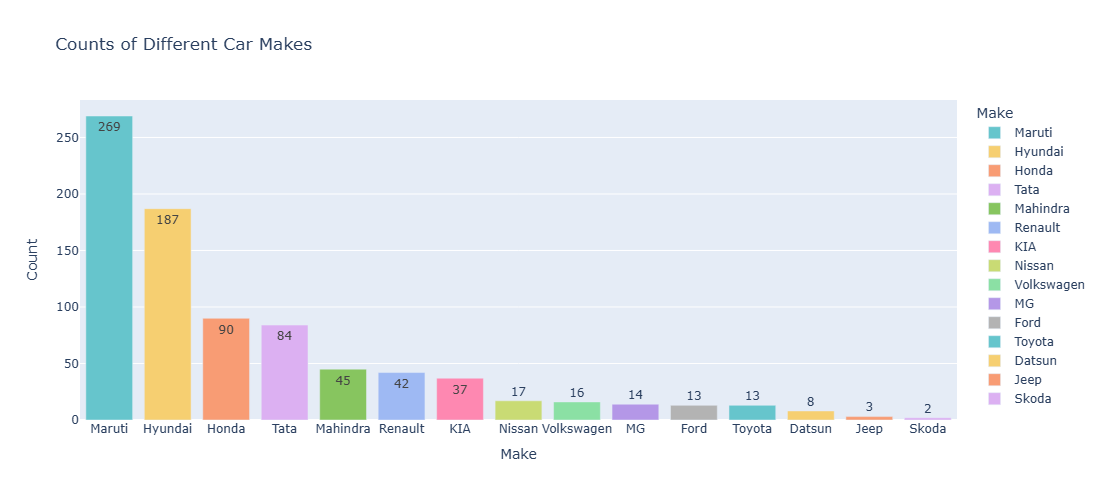

In [167]:
make_counts = new_df["Make"].value_counts().reset_index()
make_counts.columns = ['Make', 'Count']

# Create the bar chart
fig = px.bar(make_counts, x='Make', y='Count', title='Counts of Different Car Makes',color='Make',
             color_discrete_sequence=px.colors.qualitative.Pastel,text_auto=True)
fig.update_layout(width=1100, height=500)
fig.show()

In [ ]:
#Above bar chart is showing the count of Makes 
#from above visualization we can declare that maruti has highest no of cars with count of 
#269 cars
#and skoda has least no of cars with count of 2 cars

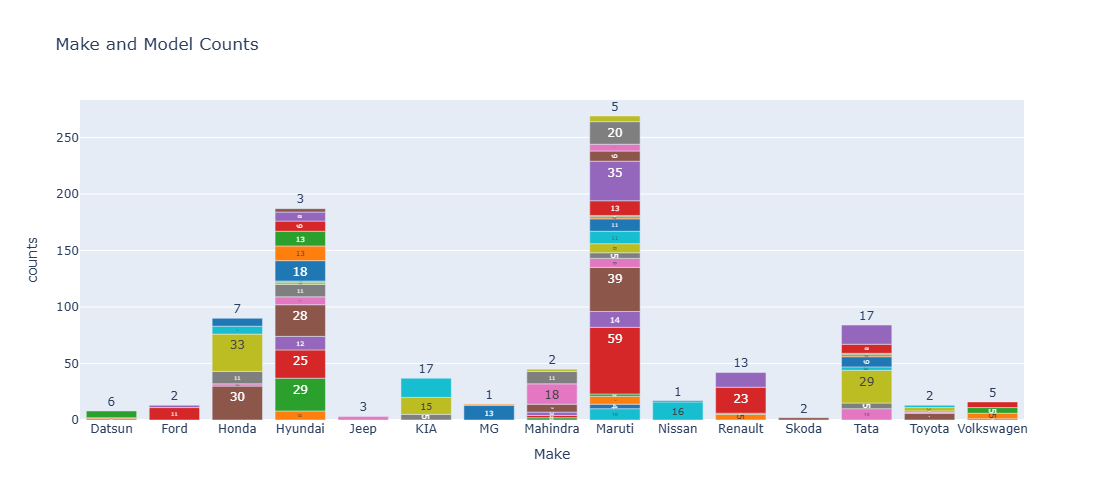

In [169]:
grouped_df = new_df.groupby(['Make', 'Model']).size().reset_index(name='counts')

# Plotting with plotly.express
fig1 = px.bar(
    grouped_df,x="Make",y="counts",color="Model",text="counts",title="Make and Model Counts",
    color_discrete_sequence=px.colors.qualitative.D3  # Custom color sequence for distinction
)
fig1.update_layout(width=1100, height=500,showlegend=False)
fig1.show()

In [ ]:
#From above graph we can observe that How many models and how many cars are there in
#each make
#From above we can observe that maruthi has so many models 
#and Jeep has only one model

In [171]:
new_df.groupby("Make")["Current_Price"].min()

Make
Datsun        175000
Ford          438999
Honda         227999
Hyundai       179000
Jeep          994999
KIA           720000
MG            961999
Mahindra      451999
Maruti        167000
Nissan        178000
Renault       231999
Skoda         841000
Tata          364000
Toyota        193000
Volkswagen    331000
Name: Current_Price, dtype: int64

In [179]:
#from above groupby function we can know the min price of car for each make
#Jeep has highest price among all makes
# and maruthi has cheapest price

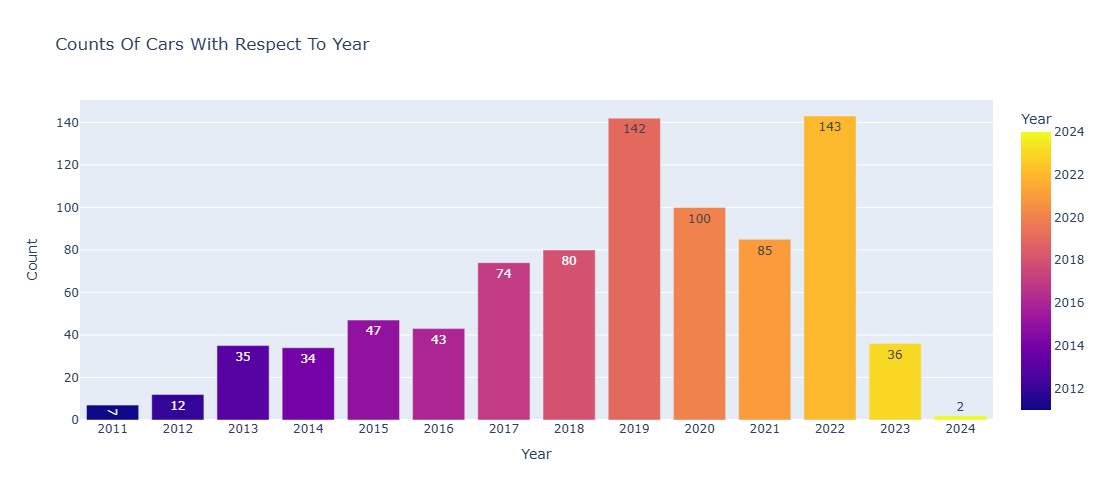

In [173]:
Year_counts = new_df["Year"].value_counts().reset_index()
Year_counts.columns = ['Year', 'Count']

# Create the bar chart
fig = px.bar(Year_counts, x='Year', y='Count', title='Counts Of Cars With Respect To Year',color="Year",
             color_discrete_sequence=px.colors.qualitative.D3,text_auto=True)
fig.update_layout(width=1100, height=500,xaxis=dict(tickangle=0,dtick=1))
fig.show()

In [ ]:
#Year wise car count 
#we have more used cars of year 2022 and less of year 2024

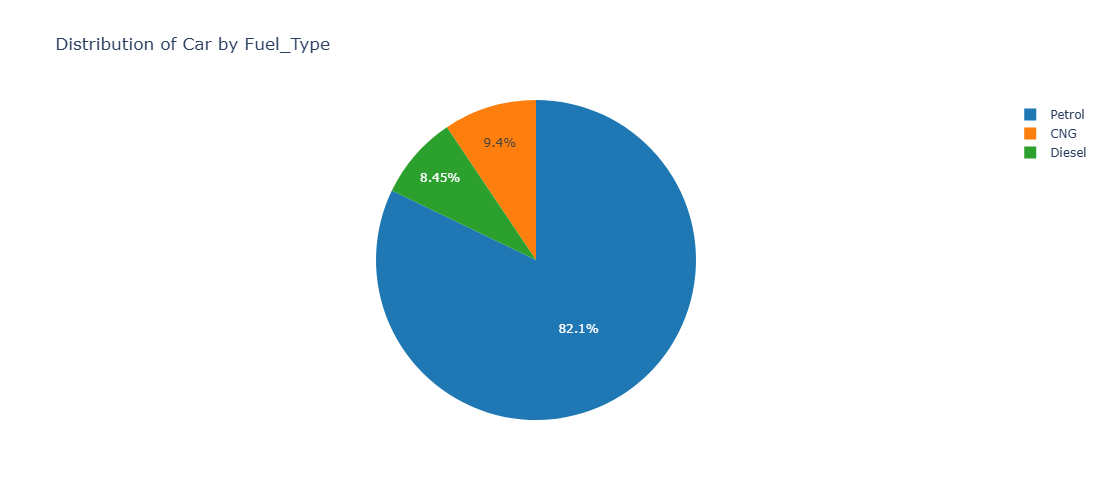

In [280]:
Fuel_Type_counts = new_df["Fuel_Type"].value_counts().reset_index()
Fuel_Type_counts.columns = ['Fuel_Type', 'Count']

# Create the pie chart
fig = px.pie(Fuel_Type_counts, values='Count', names='Fuel_Type', title='Distribution of Car by Fuel_Type',
             color_discrete_sequence=px.colors.qualitative.D3)
fig.update_layout(width=1100, height=500)
fig.show()

In [ ]:
#The pie chart provides a visual representation of the distribution of 
#different fuel types among the cars in your dataset. Each slice of the 
#pie represents a different fuel type, and the size of each slice 
#corresponds to the number of cars using that fuel type.

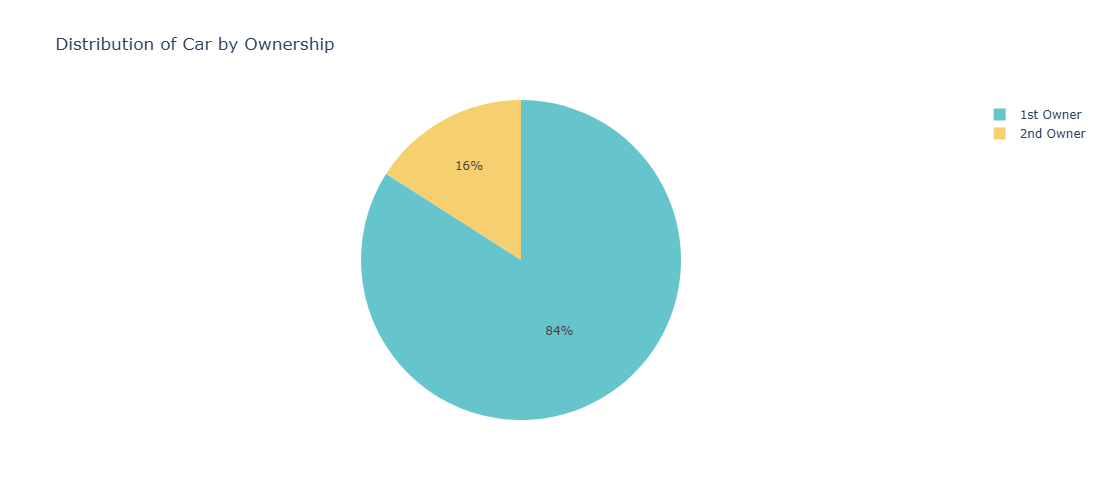

In [282]:
Ownership_counts = new_df["Ownership"].value_counts().reset_index()
Ownership_counts.columns = ['Ownership', 'Count']

# Create the pie chart
fig = px.pie(Ownership_counts, values='Count', names='Ownership', title='Distribution of Car by Ownership',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(width=1100, height=500)
fig.show()

In [ ]:
#From above we can get to know that how many times car has sold to how many members

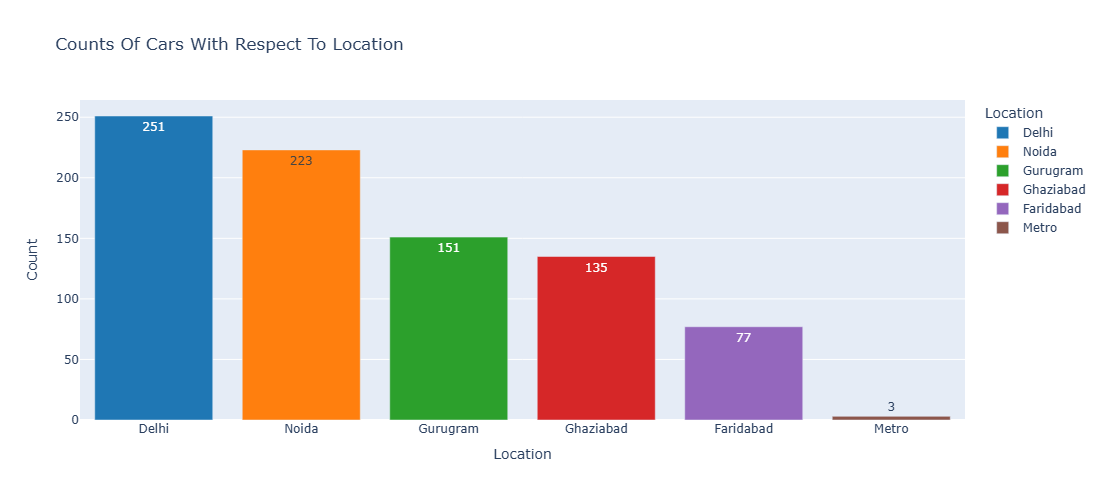

In [179]:
Location_counts = new_df["Location"].value_counts().reset_index()
Location_counts.columns = ['Location', 'Count']

# Create the bar chart
fig = px.bar(Location_counts, x='Location', y='Count', title='Counts Of Cars With Respect To Location',color="Location",
             color_discrete_sequence=px.colors.qualitative.D3,text_auto=True)
fig.update_layout(width=1100, height=500,xaxis=dict(tickangle=0,dtick=1))
fig.show()

In [ ]:
#Location wise cars 
#in delhi there are more used cars are present and in metro there are only 3

In [181]:
new_df.pivot_table(index='Location', columns='Make', values='Model', aggfunc='count').fillna('-')

Make,Datsun,Ford,Honda,Hyundai,Jeep,KIA,MG,Mahindra,Maruti,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen
Location,,,,,,,,,,,,,,,
Delhi,5.0,7.0,33.0,47.0,2.0,10.0,6.0,13.0,75.0,4.0,15.0,-,22.0,6.0,6.0
Faridabad,-,-,13.0,17.0,-,3.0,1.0,3.0,25.0,3.0,4.0,-,7.0,-,1.0
Ghaziabad,1.0,2.0,10.0,35.0,-,3.0,2.0,4.0,48.0,3.0,9.0,1.0,9.0,4.0,4.0
Gurugram,1.0,1.0,14.0,34.0,1.0,11.0,1.0,5.0,55.0,2.0,7.0,-,17.0,-,2.0
Metro,-,-,-,-,-,-,-,1.0,1.0,-,-,-,1.0,-,-
Noida,1.0,3.0,20.0,54.0,-,10.0,4.0,19.0,65.0,5.0,7.0,1.0,28.0,3.0,3.0


In [ ]:
#above pivottable represents that count of models with respect to Make

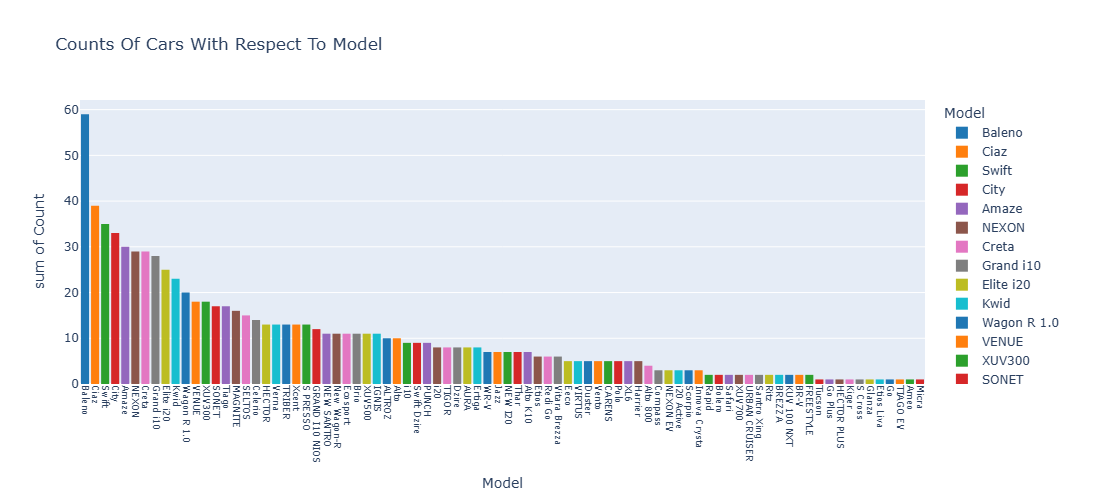

In [183]:
Model_counts = new_df["Model"].value_counts().reset_index()
Model_counts.columns = ['Model', 'Count']

# Create the histogram
fig = px.histogram(Model_counts, x='Model', y='Count', title='Counts Of Cars With Respect To Model',
                   color='Model', color_discrete_sequence=px.colors.qualitative.D3)
fig.update_layout(width=1100, height=500, xaxis=dict(tickangle=90, dtick=1))
fig.update_xaxes(tickfont=dict(size=9))
fig.show()

In [ ]:
#Count of cars with respect to models 
#there are more baleno cars are there to buy in market

In [185]:
new_df["Kilometers_Drived"].describe()#statistical analysis

count       840.000000
mean      48597.211905
std       25857.010179
min         450.000000
25%       28408.750000
50%       44765.500000
75%       65988.750000
max      125298.000000
Name: Kilometers_Drived, dtype: float64

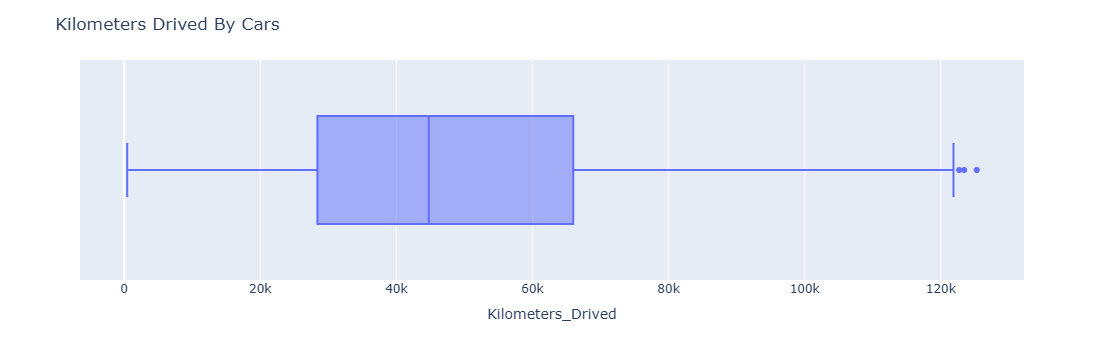

In [187]:
fig = px.box(new_df, x="Kilometers_Drived")
fig.update_layout(title="Kilometers Drived By Cars")
fig.show()

In [ ]:
#box plot shows that kilometers used average 48597km are used
#above there are outliers also

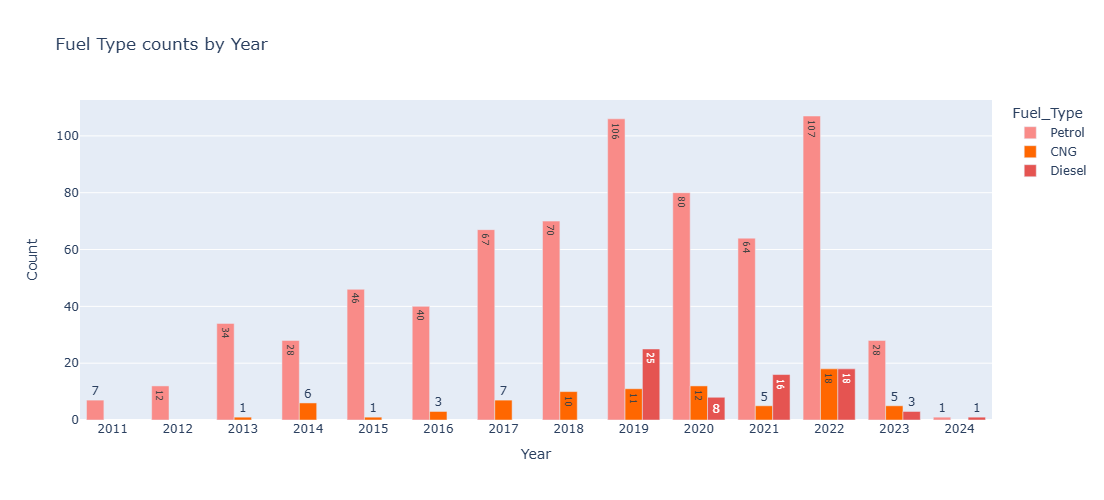

In [189]:
grouped_df = new_df.groupby(['Year', 'Fuel_Type']).size().reset_index(name='counts')
custom_colors = ['#F98B88','#FF6700','#E55451']
fig = px.bar(grouped_df, x='Year', y='counts', color='Fuel_Type', barmode='group',color_discrete_sequence=custom_colors,
             labels={'counts': 'Count', 'Year': 'Year', 'Fuel_Type': 'Fuel_Type'},
             title='Fuel Type counts by Year',text_auto=True)
fig.update_layout(width=1100, height=500, xaxis=dict(tickangle=0, dtick=1))
fig.show()

In [ ]:
#Above bar chart shows that cars with vrious fuel types are present in different years

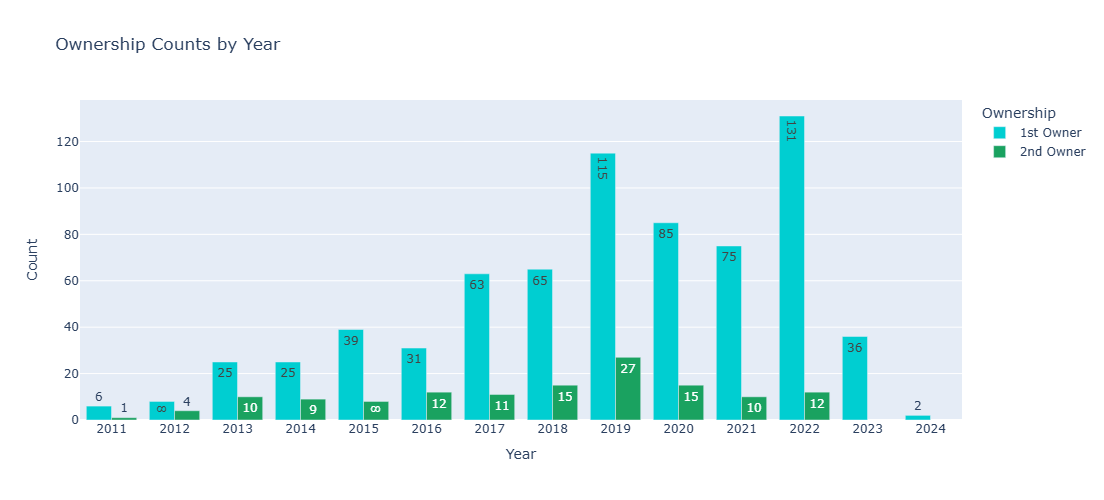

In [191]:
grouped_df = new_df.groupby(['Year', 'Ownership']).size().reset_index(name='counts')
custom_colors = ['#00CED1', '#1AA260']
fig = px.bar(grouped_df, x='Year', y='counts', color='Ownership', barmode='group',color_discrete_sequence=custom_colors,
             labels={'counts': 'Count', 'Year': 'Year', 'Ownership': 'Ownership'},
             title='Ownership Counts by Year',text_auto=True)
fig.update_layout(width=1100, height=500, xaxis=dict(tickangle=0, dtick=1))
fig.show()

In [ ]:
#Ownership with respect to Years

In [193]:
new_df['Kilometers_Drived'].corr(new_df['Emi_per_month'])

-0.24658525164530723

In [195]:
new_df["Emi_per_month"].describe()

count      840.000000
mean     12515.881845
std       5167.113426
min       3421.000000
25%       8719.750000
50%      11299.000000
75%      15249.000000
max      25042.875000
Name: Emi_per_month, dtype: float64

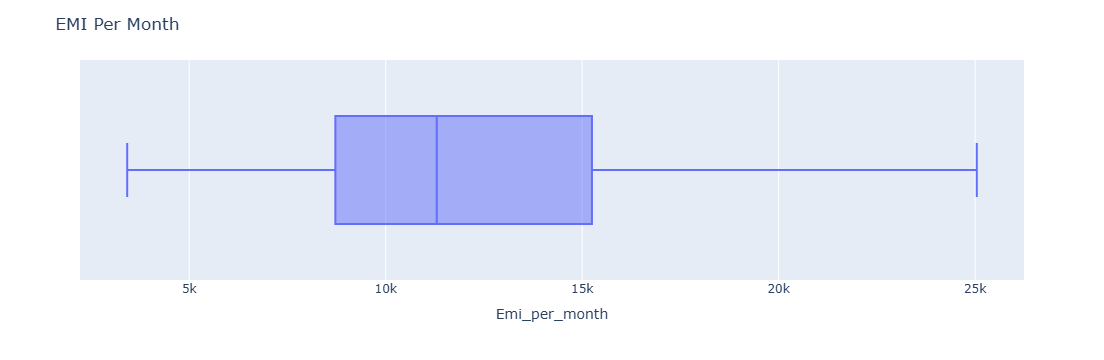

In [197]:
fig = px.box(new_df, x="Emi_per_month")
fig.update_layout(title="EMI Per Month")
fig.show()

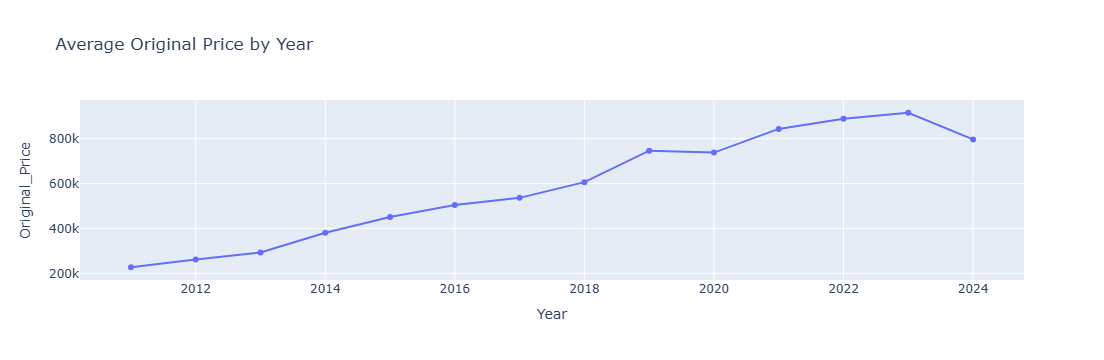

In [203]:
grouped_df = new_df.groupby('Year')['Original_Price'].mean().reset_index()
fig = px.line(grouped_df, x='Year', y='Original_Price', 
              title='Average Original Price by Year',markers=True)
fig.show()

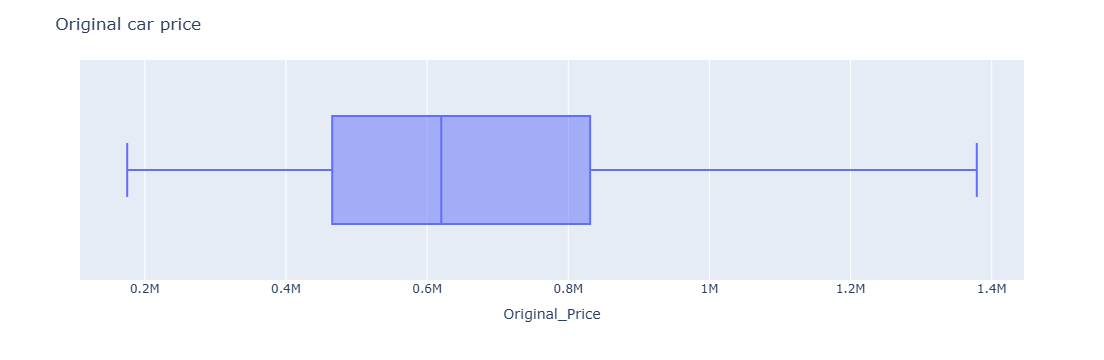

In [217]:
fig = px.box(new_df, x="Original_Price")
fig.update_layout(title="Original car price")
fig.show()

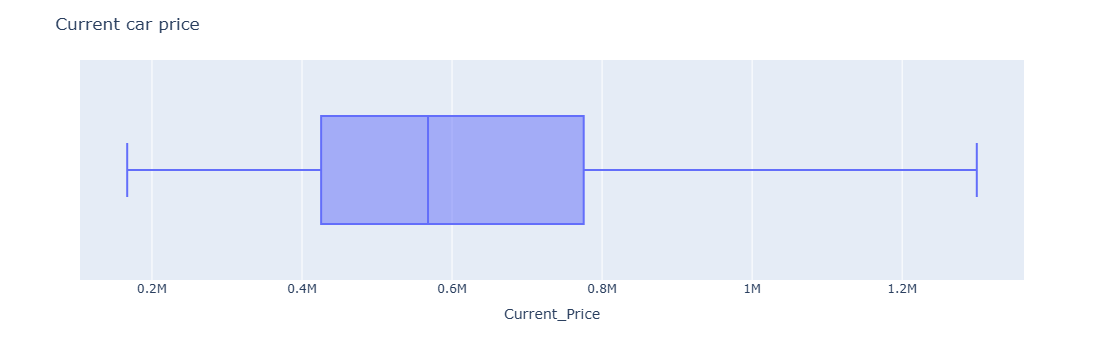

In [219]:
fig = px.box(new_df, x="Current_Price")
fig.update_layout(title="Current car price")
fig.show()

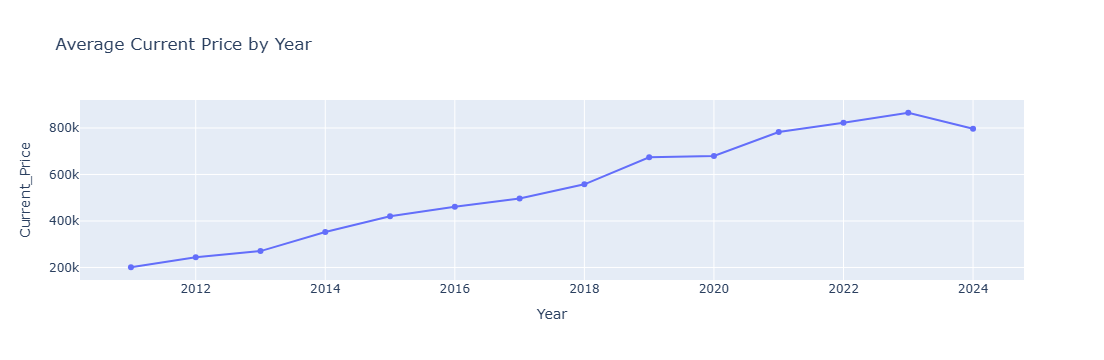

In [205]:
grouped_df = new_df.groupby('Year')['Current_Price'].mean().reset_index()
fig = px.line(grouped_df, x='Year', y='Current_Price', 
              title='Average Current Price by Year',markers=True)
fig.show()

In [207]:
new_df["Original_Price"].describe()

count    8.400000e+02
mean     6.810404e+05
std      3.013293e+05
min      1.750000e+05
25%      4.657500e+05
50%      6.200000e+05
75%      8.310000e+05
max      1.378875e+06
Name: Original_Price, dtype: float64

In [209]:
new_df.groupby("Year")["Emi_per_month"].mean()

Year
2011     9465.285714
2012     8089.500000
2013     7274.685714
2014     8501.441176
2015     8431.255319
2016     9192.372093
2017     9820.783784
2018    10965.675000
2019    13443.530810
2020    13181.795000
2021    15074.214706
2022    15883.680944
2023    16677.034722
2024    15302.500000
Name: Emi_per_month, dtype: float64

In [213]:
new_df

,Make,Model,Variant,Year,Kilometers_Drived,Fuel_Type,Ownership,Emi_per_month,Current_Price,Original_Price,Location
0,Mahindra,Thar,LX D 4WD MT CONVERTIBLE,2020,11003,Diesel,1st Owner,21756.000,1143000,1231000,Delhi
1,Tata,Harrier,XT PLUS 2.0L KRYOTEC DARK EDITON,2022,27990,Diesel,1st Owner,25042.875,1299500,1378875,Delhi
2,Mahindra,Scorpio,S11 2WD,2020,38553,Diesel,1st Owner,25042.875,1299500,1378875,Noida
3,Tata,PUNCH,CREATIVE 1.2 RTN DUAL TONE,2022,450,Petrol,1st Owner,14917.000,763000,846000,Ghaziabad
4,Mahindra,XUV700,AX 7 LUXURY D AWD AT 7 STR,2022,62839,Diesel,1st Owner,25042.875,1299500,1378875,Gurugram
...,...,...,...,...,...,...,...,...,...,...,...
835,Honda,BR-V,1.5L I-VTEC V,2016,29151,Petrol,2nd Owner,11280.000,577000,577000,Delhi
836,Volkswagen,Vento,HIGHLINE 1.6 MPI,2013,71793,Petrol,1st Owner,8716.000,331000,358000,Noida
837,Maruti,Swift,ZXI PLUS,2018,37041,Petrol,2nd Owner,11085.000,567000,567000,Noida
838,Ford,Ecosport,TITANIUM 1.5L PETROL AT,2016,49798,Petrol,1st Owner,10661.000,545000,545000,Delhi


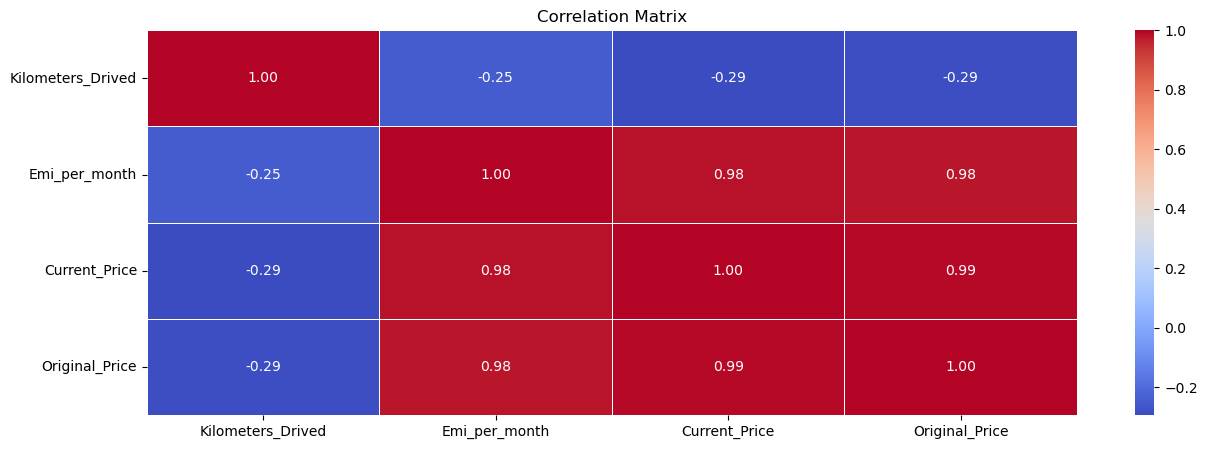

In [215]:
numerical_columns = ['Kilometers_Drived', 'Emi_per_month', 'Current_Price', 'Original_Price']
correlation_matrix = new_df[numerical_columns].corr()
plt.figure(figsize=(15, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Conclusion
The Exploratory Data Analysis (EDA) on the Cars24 used cars dataset successfully provided a comprehensive understanding of the used car market. By examining various attributes such as brand, model, year of manufacture, mileage, fuel type, and ownership history, we identified key factors that influence car prices and uncovered significant market trends. The analysis highlighted the distribution of car prices, revealing patterns and outliers, and emphasized the impact of different variables on pricing. Additionally, the insights gained from this analysis can help in identifying popular car models and understanding customer preferences. These findings offer actionable insights for both buyers and sellers, enabling them to make informed decisions and optimize pricing strategies. Furthermore, the EDA serves as a solid foundation for developing predictive models to estimate car prices, enhancing the decision-making process in the used car market.